___

<div>
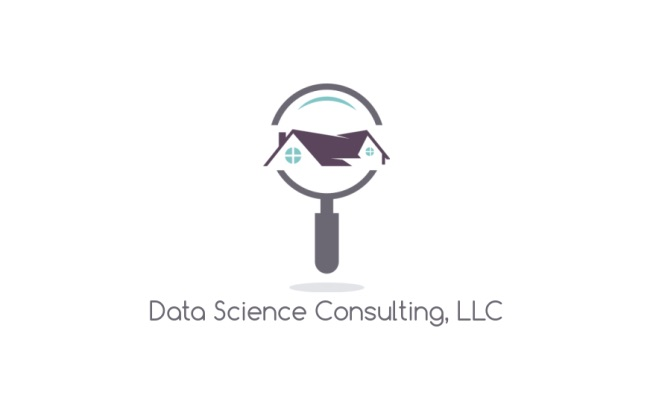
</div>

___

# Regression Analysis

## By: Dionne L. Taylor
## Cohort: O'Neil



## Project Description 
### Regression Project: Estimating Home Value
#### Summarize the findings and insights from the data exploration, modeling, and evaluation steps. Present the results to stakeholders, highlighting how the model meets their requirements and expectations.




## Regression Project Plan


#### 1. Data Acquisition

#### 2. Hypothesis Testing

#### 3. Data Validation & Quality Assurance

#### 4. Data Exploration

#### 5. Feature Engineering

#### 6. Model Selection

#### 7. Model Evaluation

#### 8. Model Intepretations

#### 8. Model Validation

#### 10. Recommendations


## Reproduction Steps

#### 1. Obtain dataset from MySqL database or saved csv. Dataset iincludes joins from properties_2017, predictions_2017, and propertylandusetype tables.

#### 2. Load the zillow dataset into a Jupyter Notebook or other development environment.

#### 3. Perform data cleaning and exploratory data analysis to gain insights into the zillow dataset.

#### 4. Build and test different machine learning models to predict assessed property value without using landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount.

#### 5. Evaluate model performance using metrics.

#### 6. Recommend the best-performing model to predict assessed property value.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import wrangle
import env
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


## Data Dictionary

In [ ]:
wrangle.data_dict()

## Data Acquisition & Cleaning:
>Use SQL to filter the properties with transactions in 2017.
Join the properties_2017, predictions_2017, and propertylandusetype tables.Extract the required features ('square feet of the home', 'number of bedrooms', and 'number of bathrooms') and the target variable ('taxvaluedollarcnt').

In [ ]:
df = wrangle.wrangle_zillow_data()

In [ ]:
df

## Hypothesis:

H$_0$: There is no linear relationship between total_sqft and assessed_property_value

H$_a$: There is linear relationship between total_sqft and assessed_property_value

In [ ]:
wrangle.feature_correlation(df)

## Data Validation & Quality Assurance:
> Check the data types and missing values.
Validate the data by cross-referencing it with the source or any documentation available.
> Use cross-validation to evaluate the performance of different regression models on your dataset.

In [ ]:
wrangle.summarize_data(df)

In [ ]:
wrangle.cv_evaluation(df)

## Data Exploration:
>Explore the distributions and relationships between the features and the target variable.
Identify any potential outliers or anomalies.

In [ ]:
wrangle.check_feature_importance(df)

In [ ]:
wrangle.feature_elimination(df, n_features_to_select=3)

In [ ]:
wrangle.hist_frequency_chart(df, continuous_vars=['total_sqft', 'year_built', 'lot_sqft', 'num_rooms'])

## Feature Engineering:
> Handle missing values using appropriate techniques (imputation, dropping, etc.).
Encode categorical variables if needed.
Remove any features that leak information about the target variable.

In [ ]:
wrangle.get_stats(df, 'assessed_property_value')

In [ ]:
X = X.drop('total_sqft', axis=1)
get_stats(df[X.columns], df['assessed_property_value_scaled'])

## Model Selection:
> Split the data into train, validation, and test sets.
Test different regression models (e.g., linear regression, decision tree, random forest, etc.) on the training set to identify the best performing model.

In [ ]:
wrangle.model_selection(df, 'assessed_property_value')

## Model Evaluation:
> Evaluate the selected model on the validation set using appropriate metrics (e.g., mean squared error, R-squared, etc.).

In [ ]:
wrangle.model_eval(df, 'assessed_property_value')

## Model Interpretation:
> Investigate the importance of individual features in the final model.
Gain insights into the relationships between the features and the target variable.

In [ ]:
best_params = {
    'n_estimators': 200,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True
    }

In [ ]:
wrangle.model_interpretation(df, 'assessed_property_value', best_params)

##  Model Validation:
> Test the final model on the test set to assess its performance on unseen data.

In [ ]:
target_column = 'assessed_property_value'
wrangle.model_validation(df, target_column)

In [ ]:
# Choose the features you want to plot, e.g., '' and ''
x_feature = 'total_sqft'
y_feature = 'assessed_property_value'

sns.lmplot(x=x_feature, y=y_feature, data=df, height=7, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title(f'{y_feature} vs {x_feature}')
plt.show()

## Conclusion, Thanks for your time and attention!